# Final Project 3 (PYTN-KS18)
##### Anggota Kelompok :
1. Abraham Linggom Tampubolon
2. Farhan Ihtifazhuddin
3. Meila Suci

# Perkenalan
#### A. Latar Belakang
penyakit Kardiovaskular merupakan salah satu penyebab kematian tertinggi di dunia. Menurut data WHO, pada tahun 2016 sejumlah 15, 2 juta jiwa meninggal dunia akibat jantung. Gejala penyakit jantung dapat bervariasi, tetapi gejala umum meliputi nyeri dada, sesak napas, pembengkakan di kaki, lemas, dan pingsan. Penanganan penyakit jantung tergantung pada jenisnya dan dapat meliputi perbaikan gaya hidup, pemberian obat-obatan untuk jantung, atau tindakan operasi seperti operasi katup jantung atau transplantasi. Pada proyek ini, bertujuan untuk mengembangkan model prediksi yang dapat memprediksi keselamatan pasien dari penyakit jantung sehingga dapat membantu dalam upaya pencegahan dan pengobatan penyakit jantung serta mengetahui apa-apa saja faktor yang paling berpengaruh dalam penyakit jantung.
#### B. Data yang digunakan
Dataset diambil dari situs web kaggle dengan url :
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
Dataset ini berisi 13 atribut dengan penjelasan singkat adalah sebagai berikut :
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up
#### C. Objective yang ingin dicapai
Tujuan dari project ini adalah untuk memprediksi keselamatan pasien dari penyakit jantung dengan memperhatikan faktor-faktor didalamnya serta mengetahui faktor yang paling berpengaruh pada resiko penyakit jantung.
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
- Mampu memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# Import Pustaka

In [160]:
import pandas as pd
import numpy as np #

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

# Data Loading

Melakukan proses loading dari dataset "heart_failure_clinical_records_dataset.csv"

In [161]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38,1,155000.00,1.10,143,1,1,270,0
295,55.00,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
296,45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,278,0
297,45.00,0,2413,0,38,0,140000.00,1.40,140,1,1,280,0


In [162]:
# Mengetahui informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [163]:
# Mengetahui dimensi dari dataset
df.shape

(299, 13)

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


# Data Cleaning
Melakukan proses cleaning pada data, seperti memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dsb.

## Handling Missing Value

In [165]:
# Memeriksa kolom yang memiliki missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [166]:
# Mengetahui jumlah data yang duplikat
df.duplicated().sum()

0

In [167]:
# Memberi nama baru pada setiap kolom agar lebih mudah dalam menganalisis
df= df.rename(columns={'creatinine_phosphokinase':'enzim_CPK', 'ejection_fraction' : 'fraksi_ejeksi', 'high_blood_pressure' : 'tekanan_darah_tinggi',
                       'sex' : 'jenis_kelamin', 'DEATH_EVENT' : 'resiko_kematian'})

In [168]:
# Mengetahui 5 dataset teratas
df.head()

,age,anaemia,enzim_CPK,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,jenis_kelamin,smoking,time,resiko_kematian
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


# Explorasi Data

In [169]:
# Mengetahui data unique dari setiap variabel
df.nunique()

age                      47
anaemia                   2
enzim_CPK               208
diabetes                  2
fraksi_ejeksi            17
tekanan_darah_tinggi      2
platelets               176
serum_creatinine         40
serum_sodium             27
jenis_kelamin             2
smoking                   2
time                    148
resiko_kematian           2
dtype: int64

## Presentase Pasien Selamat dan Tidak Selamat

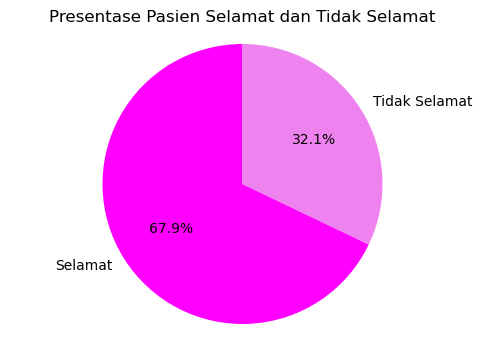

In [170]:
labels = ['Selamat', 'Tidak Selamat']
data = df['resiko_kematian'].value_counts()
colors = ['magenta','violet']

plt.figure(figsize=(6, 4))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Presentase Pasien Selamat dan Tidak Selamat')
plt.show()

## Distribusi Riwayat Diabetes

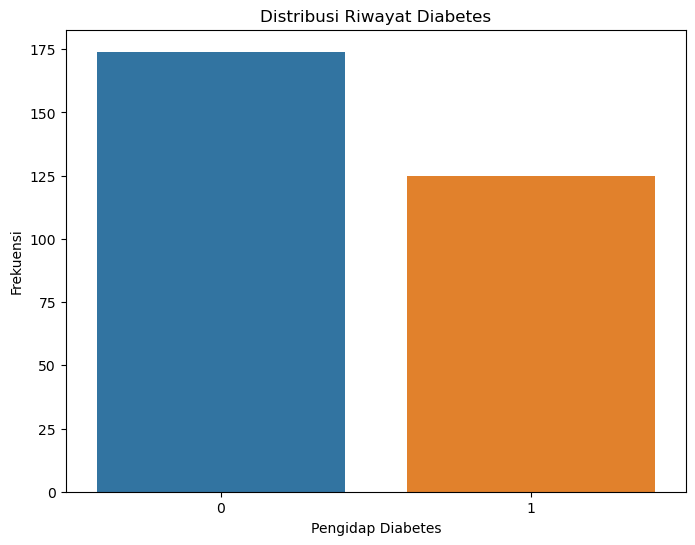

In [171]:
plt.figure(figsize=(8, 6))

sns.countplot(x='diabetes', data=df)
plt.title('Distribusi Riwayat Diabetes')
plt.xlabel('Pengidap Diabetes')
plt.ylabel('Frekuensi')
plt.show()

## Resiko Kematian bagi Pasien Perokok

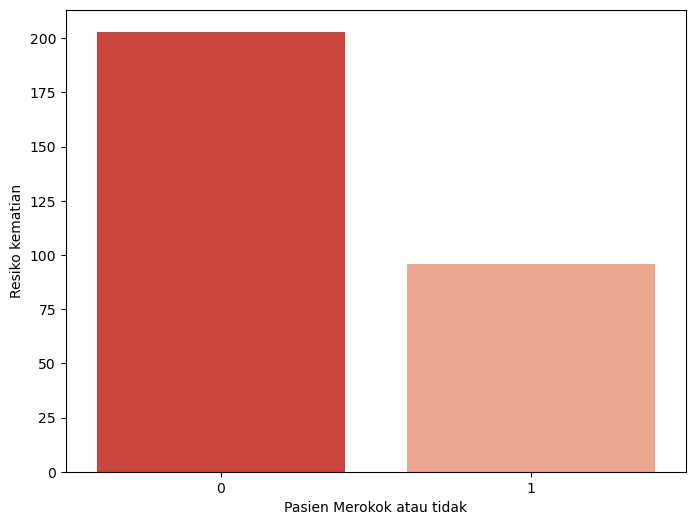

In [172]:
plt.figure(figsize=(8, 6))

sns.barplot(x=df["smoking"].value_counts().index,
            y=df["resiko_kematian"].value_counts(),
            data=df, palette = "Reds_r")
plt.xlabel('Pasien Merokok atau tidak')
plt.ylabel('Resiko kematian')
plt.show()

## Jumlah Resiko kematian berdasarkan Jenis Kelamin

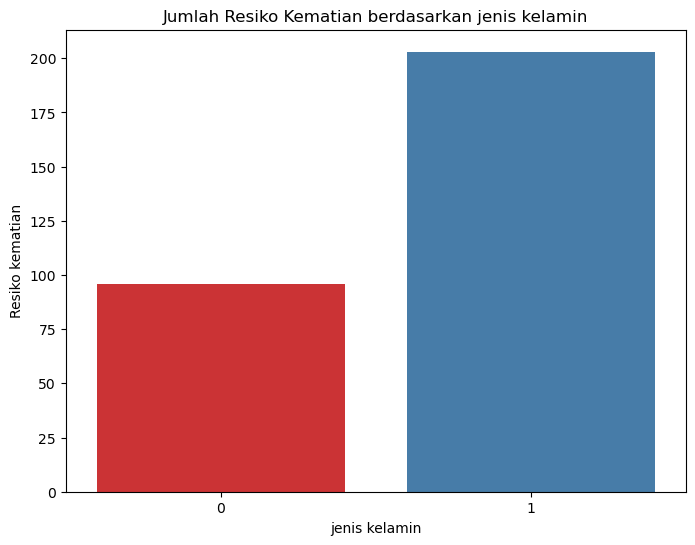

In [173]:
plt.figure(figsize=(8, 6))

sns.barplot(x=df["jenis_kelamin"].value_counts().index,
            y=df["resiko_kematian"].value_counts(),
            data=df, palette = "Set1")
plt.title('Jumlah Resiko Kematian berdasarkan jenis kelamin')
plt.xlabel('jenis kelamin')
plt.ylabel('Resiko kematian')
plt.show()

## Banyaknya Enzim CPK pada Penderita Darah Tinggi Berdasarkan Jenis Kelamin

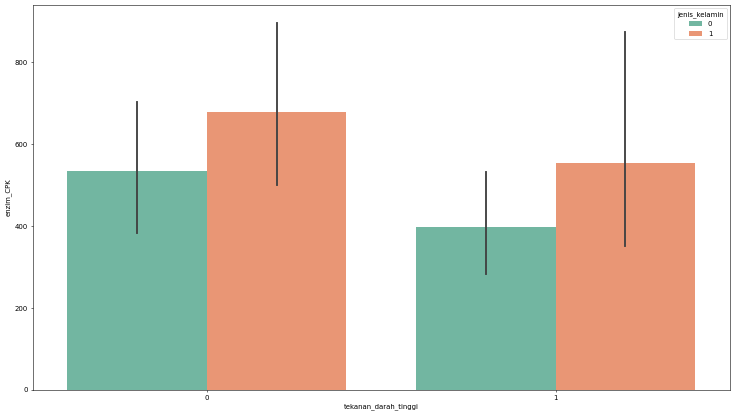

In [174]:
plt.figure(figsize = (18, 10), dpi=50)

sns.barplot(x = "tekanan_darah_tinggi", y = "enzim_CPK", hue = "jenis_kelamin",
            data = df, palette = "Set2");

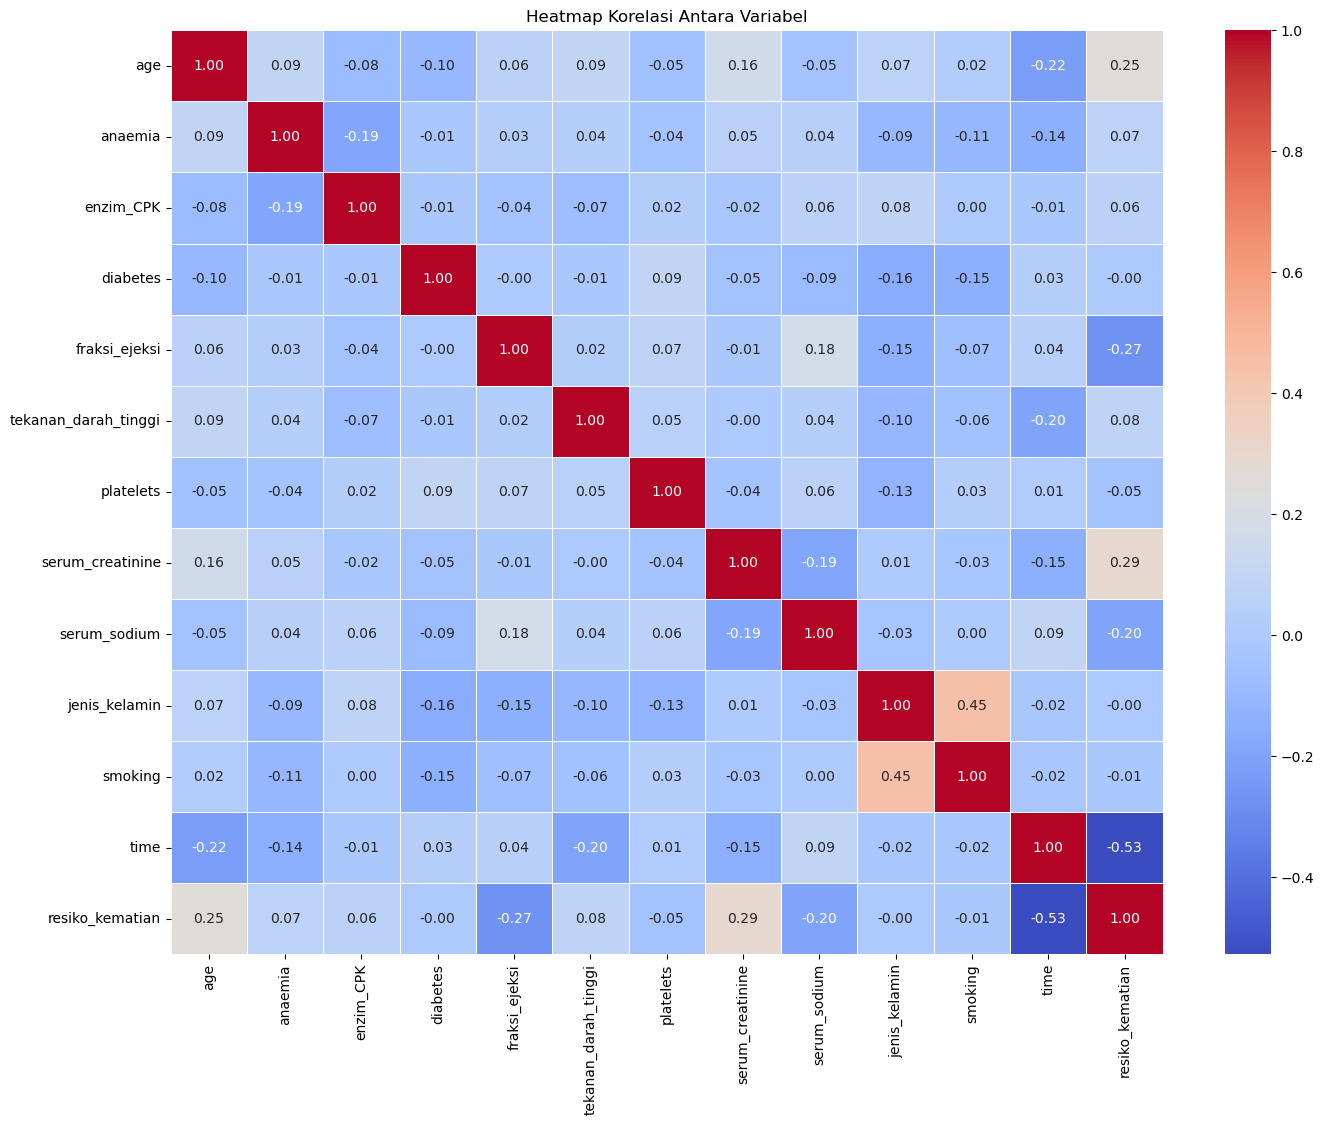

In [175]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

Variabel time memiliki korelasi yang rendah sehingga perlu dihapus

In [176]:
# Menghapus variabel 'time' karena tidak diperlukan
df.drop(columns=['time'])

,age,anaemia,enzim_CPK,diabetes,fraksi_ejeksi,tekanan_darah_tinggi,platelets,serum_creatinine,serum_sodium,jenis_kelamin,smoking,resiko_kematian
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38,1,155000.00,1.10,143,1,1,0
295,55.00,0,1820,0,38,0,270000.00,1.20,139,0,0,0
296,45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,0
297,45.00,0,2413,0,38,0,140000.00,1.40,140,1,1,0


# Data Preprocessing

In [177]:
# Menyimpan DataFrime ke dalam file pickle
df.to_pickle('df.pkl')

In [178]:
X = df.drop(['resiko_kematian'], axis=1)
y = df['resiko_kematian']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Pada Pie chart menunjukkan bahwa data mengalami imbalanced data dengan presentase pasien selamat sebesar 67,9% dan pasien tidak selamat sebesar 32,1% sehingga diperlukan oversampling dengan menambah jumlah sampel pada minoritas agar terjadi keseimbangan data.

In [180]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [181]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Pendefinisian Model

Pada proyek ketiga ini menggunakan ensemble model. Ensemble model merupakan konsep dalam pembelajaran mesin di mana beberapa model (biasanya model yang relatif sederhana) digabungkan untuk meningkatkan kinerja dan kestabilan prediksi dibandingkan dengan penggunaan satu model tunggal. 

In [182]:
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()
lr = LogisticRegression()
random_forest = RandomForestClassifier()

In [183]:
voting = VotingClassifier(
    estimators=[('knn', knn), ('naive_bayes', naive_bayes), ('Logreg', lr), ('random_forest', random_forest)])

# Pelatihan Model

In [184]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('naive_bayes', GaussianNB()),
                             ('Logreg', LogisticRegression()),
                             ('random_forest', RandomForestClassifier())])

In [185]:
y_pred = voting.predict(X_test)

# Evaluasi Model

Evaluasi model merupakan menguji akurasi dari data testing. Evaluasi dilakukan dengan menggunakan akurasi (accuracy), presisi (precision), recall, F1-score, dan matriks konfusi.
- Accuracy        : Mengukur sejauh mana model berhasil memprediksi dengan benar semua kelas (positif dan negatif) dibandingkan dengan total prediksi.
- Precision       : Mengukur sejauh mana prediksi positif dari model adalah benar. Ini memberikan informasi tentang seberapa baik model melakukan klasifikasi positif.
- Recall          : Mengukur sejauh mana model dapat mengidentifikasi keseluruhan kelas positif. Ini memberikan informasi tentang seberapa baik model mengatasi kelas positif.
- F1 Score        : Menggabungkan presisi dan recall dalam satu metrik tunggal. Ini berguna ketika kita ingin mencari keseimbangan antara presisi dan recall.
- Matriks konfusi : Tabel yang digunakan untuk mengevaluasi kinerja model, terutama pada tugas klasifikasi. Ini menyajikan jumlah True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN).

In [186]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Accuracy :', accuracy)
print (report)


Accuracy : 0.8533333333333334
              precision    recall  f1-score   support

           0       0.82      0.98      0.90        48
           1       0.94      0.63      0.76        27

    accuracy                           0.85        75
   macro avg       0.88      0.80      0.83        75
weighted avg       0.87      0.85      0.84        75



## Confusion Matrix

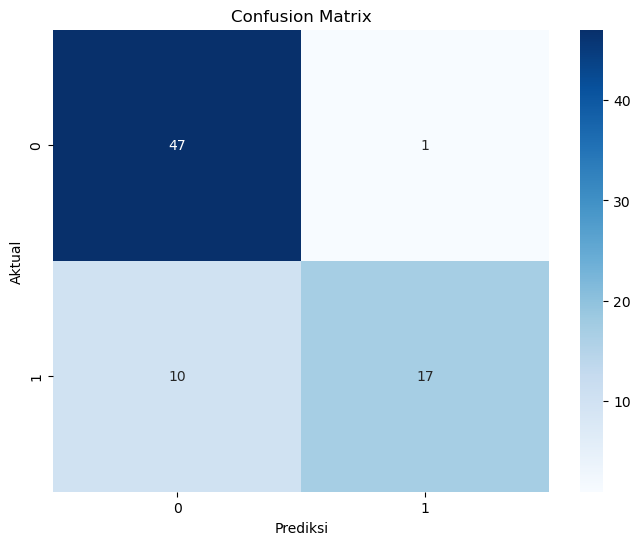

In [187]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

#### Analisis Model :
- Model prediksi memiliki akurasi sebesar 0.83 dan presisi sebesar 0.83 dengan recall sebesar 0.68 dan F1-score sebesar 0.75
- Terdapat 43 data dikategorikan benar sebagai Negatif (TN)
- Terdapat 4 data yang sebenarnya negatif tetapi model memprediksi negatif (FP) 
- terdapat 9 data yang sebenarnya positif tetapi model memprediksi negatif (FN)
- terdapat 19 data diprediksi dengan benar sebagai positif (TP)

# Model Inference

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   299 non-null    float64
 1   anaemia               299 non-null    int64  
 2   enzim_CPK             299 non-null    int64  
 3   diabetes              299 non-null    int64  
 4   fraksi_ejeksi         299 non-null    int64  
 5   tekanan_darah_tinggi  299 non-null    int64  
 6   platelets             299 non-null    float64
 7   serum_creatinine      299 non-null    float64
 8   serum_sodium          299 non-null    int64  
 9   jenis_kelamin         299 non-null    int64  
 10  smoking               299 non-null    int64  
 11  time                  299 non-null    int64  
 12  resiko_kematian       299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [189]:
# Membuat data baru yang nantinya akan diuji pada model yang telah dibuat
df_new = {
    'age': [65, 50, 70],
    'anaemia': [0, 1, 1],
    'diabetes': [0, 0, 1],
    'ejection_fraction': [45, 30, 40],
    'creatinine_phosphokinase': [150, 200, 300],
    'serum_creatinine': [1.2, 0.9, 1.3],
    'serum_sodium': [140, 135, 132],
    'high_blood_pressure': [1, 0, 1],
    'platelets': [200000, 250000, 180000],
    'sex': [1, 0, 1],
    'smoking': [0, 1, 0],
    'time': [100, 200, 150]
}
data_uji = pd.DataFrame(df_new)
data_uji

,age,anaemia,diabetes,ejection_fraction,creatinine_phosphokinase,serum_creatinine,serum_sodium,high_blood_pressure,platelets,sex,smoking,time
0,65,0,0,45,150,1.20,140,1,200000,1,0,100
1,50,1,0,30,200,0.90,135,0,250000,0,1,200
2,70,1,1,40,300,1.30,132,1,180000,1,0,150


In [191]:
#Melakukan prediksi dengan menggunakan data frame baru
y_pred_new = voting.predict(data_uji)
y_pred_new

array([0, 0, 0], dtype=int64)

# Kesimpulan

Berdasarkan analisis yang telah kami lakukan dapat disimpulkan:

- Dari visualisasi data, dapat dilihat bahwa dataset memiliki ketidakseimbangan yang signifikan antara kelas "Selamat" dan "Tidak Selamat", dengan persentase sekitar 67% pasien selamat dan 33% pasien tidak selamat.
- Dilakukan oversampling dengan menggunakan SMOTE agar data menjadi seimbang dengan menambah jumlah data pada kelas minoritas.
- Ensemble model menggunakan metode voting classifier dengan menggunakan K-Nearest Neighbors (KNN), Gaussian Naive Bayes, Logistic Regression, dan Random Forest sebagai estimator. Model ini menghasilkan akurasi sebesar 0.83 pada data testing.
- Dalam evaluasi model, ditemukan bahwa model memiliki presisi yang baik dalam mengklasifikasikan kelas "Selamat" (0) dengan recall yang tinggi, namun memiliki recall yang lebih rendah untuk mengklasifikasikan kelas "Tidak Selamat" (1). Hal ini menunjukkan bahwa model cenderung lebih baik dalam mengidentifikasi pasien yang selamat daripada pasien yang tidak selamat.
- Diketahui bahwa pasien tidak selamat akibat penyakit jantung paling banyak dialami oleh pasien berumur 60 tahun
- Pasien dengan penyakit jantung tertinggi diderita berjenis kelamin laki-laki